# Are puppos the most liked dogs?

This jupyter notebook sets to explore if there is any statistical significance in the difference between the favorite counts of puppos and that of other dogs. The project will 

In [13]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

#### Reading The data frame

In [3]:
df = pd.read_csv('copy_twitter_archive_master.csv')
df.head()

,id_str,created_at,source,full_text,expanded_url,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,has_name,has_stage,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,0,0,...,False,bagel,0.085851,False,banana,0.076110,False,1,0,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,0,0,...,True,Pekinese,0.090647,True,papillon,0.068957,True,1,1,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,0,0,...,True,malamute,0.078253,True,kelpie,0.031379,True,1,0,1.2
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,0,0,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,1,0,1.3
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,0,0,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1,0,1.2


#### Checking which dog stage has the highest favorite count

In [42]:
df.columns

Index(['id_str', 'created_at', 'source', 'full_text', 'expanded_url',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'favorite_count', 'retweet_count', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'has_name', 'has_stage', 'rating'],
      dtype='object')

In [47]:
for col in ['doggo', 'floofer', 'pupper', 'puppo']:
    print('{}s have an average favorite count of {}'.format(col, df.query(col + ' == 1')['favorite_count'].mean()))

doggos have an average favorite count of 10518.550432276657
floofers have an average favorite count of 8333.935483870968
puppers have an average favorite count of 7696.836734693878
puppos have an average favorite count of 22847.26923076923


#### Setting up the hypothesis test
H0: puppos have the same or lower favorite count than all dogs<br>
H1: puppos have a higher favorite count than all dogs

To test my hypothesis, I will bootstrap my data and observe what proportion of differences are greater than the actual value from my sample, which is the same as the p-value.

In [123]:
sample_data = df.sample(500, replace = True)  # creating the initial sample
# initializing the arrays that will 
dogs_fc = []
puppos_fc = []
fc_diff = []
for i in range(10000):
    boot = sample_data.sample(500, replace = True)
    puppo_fc = boot.query('puppo == 1')['favorite_count'].mean()  # the mean favorite count of puppos in a given simulation
    dog_fc = boot.query('puppo == 0')['favorite_count'].mean()  # the  mean favorite count of other dogs in a given simulation
    dogs_fc.append(dog_fc)  # storing mean favorite count of other dogs
    puppos_fc.append(puppo_fc)  # storing the mean favorite count of puppos
    fc_diff.append(puppo_fc-dog_fc)  # storing the difference between favorite counts in each simulation

#### Ploting the resulting arrays from the bootstraping process

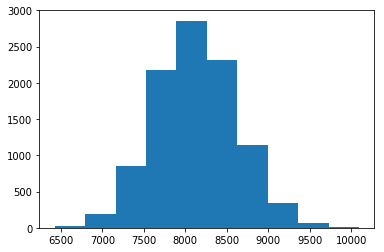

In [125]:
plt.hist(dogs_fc);

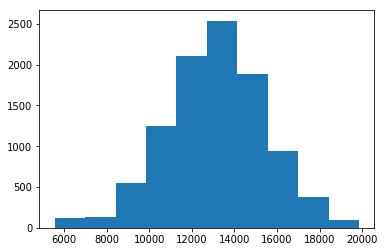

In [126]:
plt.hist(pd.Series(puppos_fc).dropna());

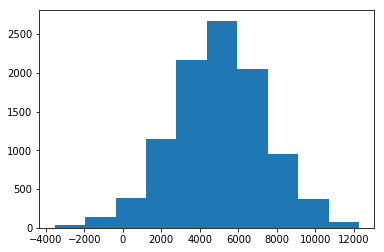

In [127]:
plt.hist(pd.Series(fc_diff).dropna());

#### Testing our hypothesis

In [129]:
sample_puppos_fc = sample_data[sample_data['puppo'] == 1]['favorite_count'].mean()
sample_dogs_fc = sample_data[sample_data['puppo'] == 0]['favorite_count'].mean()
sample_dif = sample_puppos_fc - sample_dogs_fc  # the observed difference in favorite count in the sample
(fc_diff > sample_dif).mean()  # observing what proportion of differences are greater than the actual value from my sample

C:\Users\adrian.ciubotaru\AppData\Local\Continuum\Anaconda3\envs\ab_testing\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in less


0.50700000000000001

# Conclusion

Since our p-value is greater than 0.05 we fail to reject the null. This means that there is a great chance of having the difference observed in the sample by chance.<br>
Unfortunately for puppo lovers, there is no evidence to conclude that they are more liked than other dogs.